In [1]:
import numpy as np
from PulserQUBOMethods import *

In [24]:
# First we import the distances matrix

distances = np.loadtxt("./data/matriz-rutas-granada")


# Now we define the parameters of our problem. To start with less nodes, we will use less than the lenght of the distances matrix

N = 6
p = 3
lambdas = [100.0,1.0,1.0,1.0]
activations = [True, True, True, True]
reduced_distances = distances[:N,:N]

distances_matrix_AdjRep = create_distances_matrix(reduced_distances)

R = convert_from_N_to_R(N)
distances_matrix_QUBORep = convert_from_adjacency_to_QUBO(distances_matrix_AdjRep)

Q_matrix, lambdas = create_QUBO_matrix(lambdas, p, R, distances_matrix_QUBORep, activations)

print(Q_matrix)

[[-491.5376  102.      102.      102.      102.      101.      101.
   101.      101.      100.      100.      100.      100.      100.
   100.    ]
 [ 102.     -488.3637  102.      102.      102.      101.      100.
   100.      100.      101.      101.      101.      100.      100.
   100.    ]
 [ 102.      102.     -497.7544  102.      102.      100.      101.
   100.      100.      101.      100.      100.      101.      101.
   100.    ]
 [ 102.      102.      102.     -495.294   102.      100.      100.
   101.      100.      100.      101.      100.      101.      100.
   101.    ]
 [ 102.      102.      102.      102.     -482.7049  100.      100.
   100.      102.      100.      100.      102.      100.      102.
   102.    ]
 [ 101.      101.      100.      100.      100.     -496.764   101.
   101.      101.      101.      101.      101.      100.      100.
   100.    ]
 [ 101.      100.      101.      100.      100.      101.     -497.1122
   101.      101.      101.      1

In [25]:
# Find a solution by brute force

solutions_zipped = brute_force_finding(Q_matrix, distances_matrix_QUBORep, R)

print(solutions_zipped[:10])

[('001001000000100', -892.0536, array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]]), 11.9464), ('001000000001100', -892.0444, array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]]), 11.9556), ('000000100001100', -891.4022, array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]]), 12.5978), ('000001000001100', -891.0540000000001, array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]]), 12.946000000000002), ('0010000100010

In [26]:
# Check the solution

solution = np.array(list(solutions_zipped[0][0]), dtype=int)
distance_of_solution = solutions_zipped[0][-1]

print("Solution:", solution)
print("Distance of the solution:", distance_of_solution)
print("\n")

check_constraints(solution, p, R)

Solution: [0 0 1 0 0 1 0 0 0 0 0 0 1 0 0]
Distance of the solution: 11.9464


Constraint 1 passed: The lenght of the path is correct.
The node  1  has  1.0  connections
Constraint 3 passed: The row 0 has exactly one element.
The column N-1 has less than one element


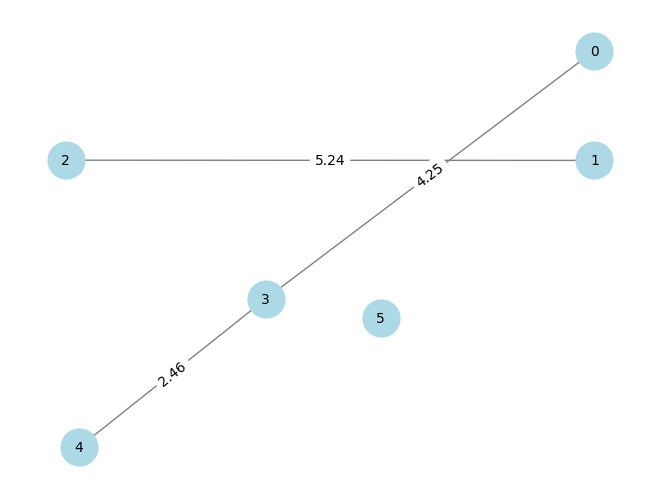

In [27]:
# Draw the solution

solution_matrix = introduce_array_in_diagonal(solution)
solution_adjacency = convert_from_QUBO_to_adjacency(solution_matrix)
draw_graph(solution_adjacency, distances_matrix_AdjRep)